In [ ]:
#Тема: Детектирование объектов

https://www.kaggle.com/brendan45774/chess-piece-dectection

In [18]:
import numpy as np
import os
import shutil
from pathlib import Path

from imageai.Detection import ObjectDetection
from imageai.Detection.Custom import DetectionModelTrainer
from imageai.Detection.Custom import CustomObjectDetection

In [2]:
detector = ObjectDetection()
detector.setModelTypeAsYOLOv3()
detector.setModelPath("../models/pretrained-yolov3.h5")
detector.loadModel()
detections = detector.detectObjectsFromImage(input_image='../data/Chess_Piece_Dectection/images/chess0.png',
                                             output_image_path='../data/Chess_Piece_Dectection/detected.png',
                                             minimum_percentage_probability=30)

for eachObject in detections:
    print(eachObject["name"] , " : ", eachObject["percentage_probability"], " : ", eachObject["box_points"] )
    print("--------------------------------")

bottle  :  39.34087157249451  :  [42, 123, 125, 219]
--------------------------------
bottle  :  45.076984167099  :  [88, 100, 133, 155]
--------------------------------


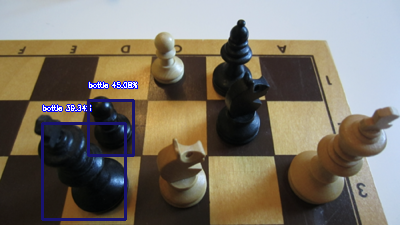

In [3]:
from PIL import Image
Image.open('../data/Chess_Piece_Dectection/detected.png')

In [4]:
root_annots_path = '../data/Chess_Piece_Dectection/annotations/'
root_images_path = '../data/Chess_Piece_Dectection/images/'

annots_path = sorted([i for i in Path(root_annots_path).glob('*.xml')])
images_path = sorted([i for i in Path(root_images_path).glob('*.png')])

n_imgs = len(images_path)

In [5]:
with open(annots_path[6], 'r') as f:
    print(f.read())


<annotation>
    <folder>images</folder>
    <filename>chess14.png</filename>
    <size>
        <width>400</width>
        <height>225</height>
        <depth>3</depth>
    </size>
    <segmented>0</segmented>
    <object>
        <name>black-bishop</name>
        <pose>Unspecified</pose>
        <truncated>0</truncated>
        <occluded>0</occluded>
        <difficult>0</difficult>
        <bndbox>
            <xmin>184</xmin>
            <ymin>54</ymin>
            <xmax>238</xmax>
            <ymax>152</ymax>
        </bndbox>
    </object>
</annotation>


In [6]:
set_classes = set()

for annot in annots_path:
    with open(annot, 'r') as f:
        string = f.read()
        name = string[string.find('<name>')+6:string.find('</name>')]
        set_classes.add(name)

classes = np.array(list(set_classes))
print(classes)

['black-rook' 'white-pawn' 'black-knight' 'white-knight' 'white-bishop'
 'black-bishop' 'black-pawn' 'white-queen' 'white-rook' 'black-king'
 'white-king' 'black-queen']


In [21]:
os.makedirs('../imageai/data/train/images', exist_ok=True)
os.makedirs('../imageai/data/train/annotations', exist_ok=True)

os.makedirs('../imageai/data/validation/images', exist_ok=True)
os.makedirs('../imageai/data/validation/annotations', exist_ok=True)

os.makedirs('../imageai/data/test/images', exist_ok=True)
os.makedirs('../imageai/data/test/annotations', exist_ok=True)

In [8]:
n_imgs = 81
n_split = n_imgs // 6


for i, (annot_path, img_path) in enumerate(zip(annots_path, images_path)):    
    if i > n_imgs:
        break
    # train-val-test split
    if i < n_split:
        shutil.copy(img_path, '../imageai/data/test/images/' + img_path.parts[-1])
        shutil.copy(annot_path, '../imageai/data/test/annotations/' + annot_path.parts[-1])
    elif n_split <= i < n_split*2:
        shutil.copy(img_path, '../imageai/data/validation/images/' + img_path.parts[-1])
        shutil.copy(annot_path, '../imageai/data/validation/annotations/' + annot_path.parts[-1])
    else:
        shutil.copy(img_path, '../imageai/data/train/images/' + img_path.parts[-1])
        shutil.copy(annot_path, '../imageai/data/train/annotations/' + annot_path.parts[-1])

In [9]:
print(len(list(Path('../imageai/data/train/annotations/').glob('*.xml'))))
print(len(list(Path('../imageai/data/validation/annotations/').glob('*.xml'))))
print(len(list(Path('../imageai/data/test/annotations/').glob('*.xml'))))

55
13
13


In [10]:
trainer = DetectionModelTrainer()
trainer.setModelTypeAsYOLOv3()
trainer.setDataDirectory(data_directory="../imageai/data/")
trainer.setTrainConfig(object_names_array=classes,
                       batch_size=8,
                       num_experiments=10,
                       train_from_pretrained_model="../models/pretrained-yolov3.h5")

trainer.trainModel()

Generating anchor boxes for training images and annotation...
Average IOU for 9 anchors: 0.81
Anchor Boxes generated.
Detection configuration saved in  ./imageai/data/json/detection_config.json
Evaluating over 13 samples taken from ./imageai/data/validation
Training over 55 samples  given at ./imageai/data/train
Training on: 	['black-bishop', 'black-king', 'black-knight', 'black-pawn', 'black-queen', 'black-rook', 'white-bishop', 'white-king', 'white-knight', 'white-pawn', 'white-queen', 'white-rook']
Training with Batch Size:  8
Number of Training Samples:  55
Number of Validation Samples:  13
Number of Experiments:  10
Training with transfer learning from pretrained Model


/home/irina/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(
/home/irina/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
/home/irina/anaconda3/lib/python3.8/site-packages/tensorflow/python/data/ops/dataset_ops.py:3703: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  warnings.warn(
/home/irina/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers requ

Epoch 1/10
56/56 [==============================] - 249s 4s/step - loss: 131.8951 - yolo_layer_loss: 16.6487 - yolo_layer_1_loss: 31.7587 - yolo_layer_2_loss: 71.9087 - val_loss: 193.8043 - val_yolo_layer_loss: 21.7182 - val_yolo_layer_1_loss: 43.0465 - val_yolo_layer_2_loss: 117.4593
Epoch 2/10
56/56 [==============================] - 260s 5s/step - loss: 78.5601 - yolo_layer_loss: 12.0834 - yolo_layer_1_loss: 17.9209 - yolo_layer_2_loss: 36.9753 - val_loss: 107.4937 - val_yolo_layer_loss: 12.5517 - val_yolo_layer_1_loss: 24.2961 - val_yolo_layer_2_loss: 59.0665
Epoch 3/10
56/56 [==============================] - 232s 4s/step - loss: 63.2651 - yolo_layer_loss: 7.8190 - yolo_layer_1_loss: 13.4345 - yolo_layer_2_loss: 30.4379 - val_loss: 90.4302 - val_yolo_layer_loss: 18.3332 - val_yolo_layer_1_loss: 17.4944 - val_yolo_layer_2_loss: 43.0377
Epoch 4/10
56/56 [==============================] - 278s 5s/step - loss: 60.5939 - yolo_layer_loss: 9.4566 - yolo_layer_1_loss: 13.0152 - yolo_layer

In [36]:
!ls ../imageai/data/models | tail -1

detection_model-ex-010--loss-0044.240.h5


In [34]:
!cat ../imageai/data/json/detection_config.json

{
    "labels" : [
        "black-bishop",
        "black-king",
        "black-knight",
        "black-pawn",
        "black-queen",
        "black-rook",
        "white-bishop",
        "white-king",
        "white-knight",
        "white-pawn",
        "white-queen",
        "white-rook"
    ],
    "anchors" : [
        [
            64,
            108,
            75,
            168,
            89,
            268
        ],
        [
            43,
            115,
            48,
            156,
            52,
            81
        ],
        [
            17,
            34,
            28,
            50,
            37,
            78
        ]
    ]
}

In [16]:
trainer = DetectionModelTrainer()
trainer.setModelTypeAsYOLOv3()
trainer.setDataDirectory(data_directory="../imageai/data/")
metrics = trainer.evaluateModel(model_path="../imageai/data/models/detection_model-ex-010--loss-0044.240.h5",
                                json_path="../imageai/data/json/detection_config.json",
                                iou_threshold=0.2,
                                object_threshold=0.3,
                                nms_threshold=0.5)

Starting Model evaluation....
Evaluating over 13 samples taken from ./imageai/data/validation
Training over 55 samples  given at ./imageai/data/train
Model File:  ./imageai/data/models/detection_model-ex-010--loss-0044.240.h5 

Evaluation samples:  13
Using IoU:  0.2
Using Object Threshold:  0.3
Using Non-Maximum Suppression:  0.5
black-bishop: 0.0167
black-king: 0.0000
black-knight: 0.0000
black-pawn: 0.1026
black-queen: 0.0000
black-rook: 0.0000
white-bishop: 0.0000
white-king: 0.0000
white-knight: 0.0000
white-pawn: 0.0000
white-queen: 0.0000
white-rook: 0.0000
mAP: 0.0099


In [32]:
!ls ../imageai/data/validation/images/ | tail -1

chess3.png


In [33]:
detector = CustomObjectDetection()
detector.setModelTypeAsYOLOv3()
detector.setModelPath("../imageai/data/models/detection_model-ex-010--loss-0044.240.h5")
detector.setJsonPath("../imageai/data/json/detection_config.json")
detector.loadModel()
detections = detector.detectObjectsFromImage(minimum_percentage_probability=50,
                                             input_image="../imageai/data/validation/images/chess26.png",
                                             output_image_path="../imageai/detected.jpg")
for detection in detections:
    print(detection["name"], " : ", detection["percentage_probability"], " : ", detection["box_points"])

black-rook  :  54.18282747268677  :  [209, 122, 272, 162]
white-pawn  :  55.99570274353027  :  [135, 95, 180, 115]


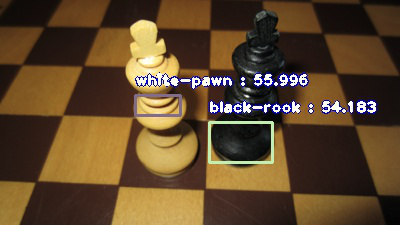

In [31]:
from PIL import Image
Image.open('../imageai/detected.jpg')